# Image Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io

In [3]:
# If necessary, uncomment one of both command and execute.
#!conda install scikit-image
#!pip install scikit-image

In [2]:
def load_image(filename):
    '''Read and transform to grayscale image.'''
    X = io.imread(filename)
    return color.rgb2gray(X)

def imshow(X, figsize=(4, 4)):
    '''
    Plot image represented by 2D array X. 
    '''
    plt.figure(figsize=figsize)
    plt.imshow(X, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.show()



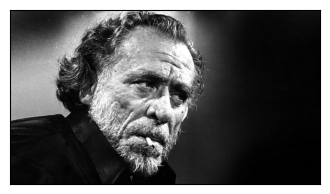

In [111]:
X = load_image('./data/cb_face.jpeg')
imshow(X)

---
### Exercise 1

Show 
+ image size
+ maximum pixel value
+ minimum pixel value 


In [41]:
# code

print(f'{"total values stored: ":25} {X.size:10}')
print(F'{"rows/collumns: ":25} {X.shape[0]} {"/":s} {X.shape[1]:<}')
print(f'{"maximum pixel value: ":25} {X.max():10.0f}')
print(f'{"minimum pixel value: ":25} {X.min():10.0f}')

total values stored:          230400
rows/collumns:            360 / 640
maximum pixel value:               1
minimum pixel value:               0


---
### Exercise 2

Write a function that returns a noisy copy of an image by adding Gaussian distributed noise. Test the functions with different standard deviations and display the resulting images.

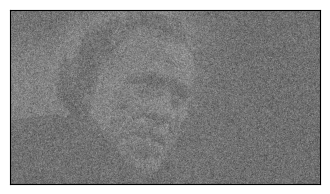

In [42]:
# code

def noisyImg(X):
    dist = np.random.standard_normal(size=X.shape)
    return dist + X
    
X_noisy = noisyImg(X)
imshow(X_noisy)

---
### Exercise 3

Write a function that crops a region of interest of an image. Test the function by trying to crop the face of the person and display the result.  

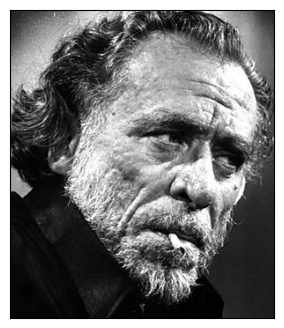

In [52]:
# code

def Crop_Face(X):
    return X[10:,100:400]
    
imshow(Crop_Face(X))

---
### Exercise 4
Write a function that flips an image horizontally. Test your function and display the resulting image. 

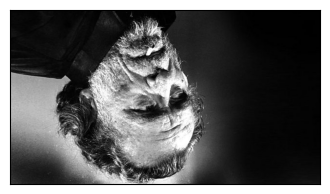

In [85]:
# code

def Flip_hor_Middle(X):
    middle = int(X.shape[0]/2)
    upperHalf = X[:middle,:]
    lowerHalf = np.flip(upperHalf,0)
    return np.append(upperHalf, lowerHalf, 0)
    
def Flip_hor(X):
    return X[-1:-X.shape[0]-1:-1,:]

imshow(Flip_hor(X))

---
### Exercise 5

Write a function that blends two images together using a weighted sum. The weights of both images should be non-negative and add to one. Test the function by blending the original image and the horizontally flipped images for different weights and display the resulting images.

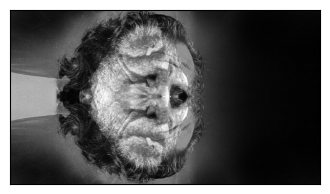

In [87]:
# code

def blendImages(X, Y, weigthX):
    weigthY = 1 - weigthX
    return (weigthX*X) + (weigthY*Y)

imshow(blendImages(X,Flip_hor(X), 0.5))

---
### Exercise 6

Write a function that returns a binary image by applying thresholding. Set pixels to white and black based on a certain threshold value. Test your function for different threshold values and display the resulting images.

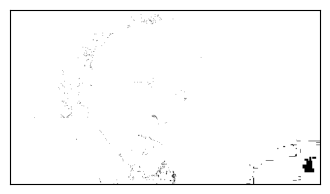

In [113]:
# code

def binary_Img(X, threshold = 0.6):
    return np.heaviside(X, threshold)

    
imshow(binary_Img(X, 0.45))